In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Problem 1

6 6


<BarContainer object of 16 artists>

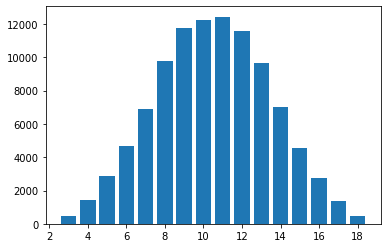

In [19]:
# First checking if number of triplets that give sum 9 and 10 are equal
sum_is_ten, sum_is_nine = 0, 0
for i in range(1, 7):
    for j in range(1, 7):
        for k in range(1, 7):
            if i + j + k == 9:
                sum_is_nine += 1
            elif i + j + k == 10:
                sum_is_ten += 1
print(i, j)

# create a 3 X 100000 matrix with values uniformly distributed from 1 to 6, this will simulate throwing 3 dice 100000 times
dice_rolls = np.random.randint(1, 7, (3, 100000))
# sum the 3 rows of the matrix to find out the sum of each roll
dice_sums = np.sum(dice_rolls, axis=0)
# np.unique will return two arrays: first one is the array of unique sums that occured in dice_sums and the second one
# is the number of times each sum occured
counts = np.unique(dice_sums, return_counts=True)
# plotting the results
plt.bar(counts[0], counts[1])

# Problem 2

In [29]:
# function to check wether triangle with given sides is possible
def is_triangle(a, b, c):
    if (a + b <= c) or (a + c <= b) or (b + c <= a) :
        return False
    else:
        return True

n_triangles = 0
# simulate cutting unit stick 100000 times
for i in range(100000):
    # get cuts from uniformly distributed values    
    cuts = np.random.uniform(0, 1, 3)
    # divide each value by its sum such that the final sum is equal to 1    
    cuts = cuts / cuts.sum()
    if is_triangle(cuts[0], cuts[1], cuts[2]):
        n_triangles += 1
print("Probability is aprox.: " + str(n_triangles/100000))

Probability is aprox.: 0.49908


# Problem 4

In [83]:
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def create_point_on_circle():
    x = np.random.uniform(-1, 1)
    sign = np.random.uniform(-1, 1)
    sign = sign / np.abs(sign)
    y = np.sqrt(1 - x*x) * sign
    return [x, y]

acute_triangles = 0

# repeat experiment 100000 times
for _ in range(100000):
    p1, p2, p3 = create_point_on_circle(), create_point_on_circle(), create_point_on_circle()
    d1, d2, d3 = distance(p1, p2), distance(p1, p3), distance(p2, p3)
    # apply cosine formula inside triangles, if cosine is greater than 0, then angle is accute    
    cos_A = (d1**2 + d2**2 - d3**2) / (2 * d1 * d2)
    cos_B = (d1**2 + d3**2 - d2**2) / (2 * d1 * d3)
    cos_C = (d2**2 + d3**2 - d1**2) / (2 * d2 * d3)
    
    if (cos_A > 0) and (cos_B > 0) and (cos_C > 0):
        acute_triangles += 1

print("Probability is aprox.:"  + str(acute_triangles/100000))

Probability is aprox.:0.2505


# Problem 5

In [88]:
both_real, both_pos  = 0, 0

for _ in range(100000):
    B = np.random.uniform(-1, 1)
    C = np.random.uniform(-1, 1)
    if (B*B - 4*C) >= 0:
        both_real += 1
        x1 = (- B + np.sqrt(B*B - 4*C)) / 2
        x2 = (- B - np.sqrt(B*B - 4*C)) / 2
        if x1 >= 0 and x2 >= 0:
            both_pos += 1

print("Probability of both being real: " + str(both_real / 100000))
print("Probability of both being positive: " + str(both_pos / 100000))

Probability of both being real: 0.54305
Probability of both being positive: 0.02081


# Problem 7

<BarContainer object of 30 artists>

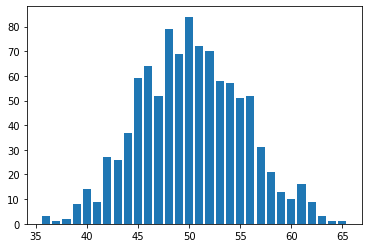

In [97]:
heads_count = []

# repeat experiment 1000 times
for i in range(1000):
    # generate 100 uniformly distributed binary values (0 is heads)     
    throws = np.random.randint(0, 2, 100)
    a = np.unique(throws, return_counts=True)
    heads_count.append(a[1][0])
    
# eliminate entries where heads turned up outside of 35, 65 interval
heads_count_copy = []
for i in range(len(heads_count)):
    if heads_count[i] >= 35 and heads_count[i] <= 65:
        heads_count_copy.append(heads_count[i])
heads_count = heads_count_copy

# make plot
heads_count = np.array(heads_count)
a = np.unique(heads_count, return_counts=True)
plt.bar(a[0], a[1])
# Answ: it does not fit a normal curve